In [1]:
import seaborn as sns
sns.set_style("white")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['figure.facecolor'] = "white"

In [3]:
colors = list(sns.color_palette("muted"))

## Conceptual population figure

<ipython-input-20-6ecfc5594f6b>:100: RuntimeWarning: divide by zero encountered in log
  increase_vals = yvals6[0] + 0.1 + 0.5*log(xvals6)


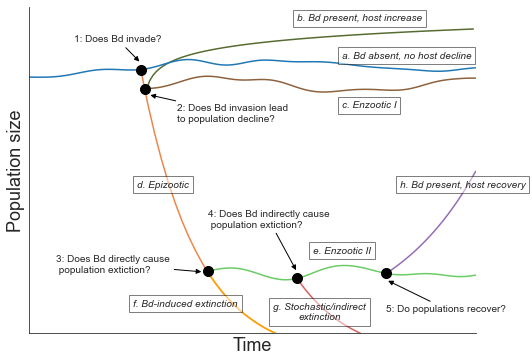

In [20]:
np.random.seed(111)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.tick_params(labelbottom=None, labelleft=None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Part 1, Initial population trajectory
start = 0
stop = 100
K = 10
num = 100
sigma = 1
cor = 0.5
rho_sq = 0.01
eta_sq = 0.05
msize = 10

# Part 1: Full Unaffected trajectory
xvals = np.linspace(start, stop, num=num)

# Gaussian process kernel
kernel = lambda x1, x2, eta_sq, rho_sq: eta_sq * np.exp(-rho_sq*(x1 - x2)**2)

xx1, xx2 = np.meshgrid(xvals, xvals)
Sigma = kernel(xx1, xx2, eta_sq, rho_sq)
#np.fill_diagonal(Sigma, 0.03) # 0.03

Mu = np.zeros(len(xvals))
yvals = K + np.random.multivariate_normal(Mu, Sigma, size=1).ravel()
ax.plot(xvals, yvals)

# Part 2a: Population decline
start_xval = num / 4
start_yval = yvals[np.int(start_xval) - 1]

r = 0.08

xvals_decline = np.linspace(0, num - start_xval)
yvals_decline = (start_yval + 1) * np.exp(-r*xvals_decline)
ax.plot(xvals_decline + start_xval, yvals_decline - 1, color=colors[1])
ax.plot(xvals_decline[0] + start_xval, yvals_decline[0] - 1, 'o', ms=msize, color='black')

# Part 2b. Population decline
xvals_decline2 = np.arange(0, (num - start_xval) + 1)
yvals_decline2 = (start_yval + 1) * np.exp(-r*xvals_decline2)

xvals2 = xvals_decline2 + start_xval
start = np.where(xvals2 == 40)[0][0]
ax.plot(xvals2[start:], yvals_decline2[start: ] - 1, color="orange")

# Part 3: Enzootic population

enzooticK = (start_yval + 1) * np.exp(-r * 15) - 1 
xvals3 = np.linspace(0, stop - 40, num=100)
xx1en, xx2en = np.meshgrid(xvals3, xvals3)
Sigma3 = kernel(xx1en, xx2en, eta_sq, rho_sq)

yvals3 = enzooticK + np.random.multivariate_normal(Mu, Sigma3, size=1).ravel()
ax.plot(xvals3 + 40, yvals3, color=colors[2])
ax.plot(xvals3[0] + 40, yvals3[0], 'o', ms=msize, color='black')

# Part 4: Stochastic extinction
r_stoch = 0.08
stoch_start = 60.

xvals4 = np.linspace(0, stop - stoch_start, num=num)
start_yvals4 = yvals3[np.where(xvals3 + 40 == stoch_start)[0][0]]


yvals4 = (start_yvals4 + 1) * np.exp(-r_stoch * xvals4)
ax.plot(xvals4 + stoch_start, yvals4 - 1, color=colors[3])
ax.plot(xvals4[0] + stoch_start, yvals4[0] - 1, 'o', ms=msize, color='black')

# Part 5: Evolutionary rescue
evo_start = 80

r_evo = 0.05
xvals5 = np.linspace(0, stop - evo_start)
start_yvals5 = yvals3[np.where(xvals3 + 40 == evo_start)[0][0]]
yvals5 = (start_yvals5) * np.exp(r_evo * xvals5)

ax.plot(xvals5 + evo_start, yvals5, color=colors[4])
ax.plot(xvals5[0] + evo_start, yvals5[0], 'o', ms=msize, color='black')

# Part 6: Invasion but no effect of Bd

noeffK = (start_yval + 1) * np.exp(-r * 1) - 1
xvals6 = np.linspace(0, stop - 26, num=100)
xx1noeff, xx2noeff = np.meshgrid(xvals6, xvals6)
Sigma6 = kernel(xx1noeff, xx2noeff, eta_sq, rho_sq)

yvals6 = noeffK + np.random.multivariate_normal(Mu, Sigma6, size=1).ravel()
ax.plot(xvals6 + 26, yvals6, color=colors[5])
ax.plot(xvals6[0] + 26, yvals6[0], 'o', ms=msize, color='black')

# Part 3b: Population increase

r_inv = 0.003
increase_vals = yvals6[0] + 0.1 + 0.5*log(xvals6)
ax.plot(xvals6 + 26 - 0.5, increase_vals, color="#556B2F", zorder=-1)



# Add in arrows and annotations to figures
arrow_dict = dict(arrowstyle="-|>",
                  connectionstyle="arc3",
                  color="black")
ax.annotate("1: Does Bd invade?",
            xy=(25, 10.2), xycoords='data',
            xytext=(10, 11), textcoords='data',
            arrowprops=arrow_dict,
            )

ax.annotate("2: Does Bd invasion lead\nto population decline?",
            xy=(26.7, 9), xycoords='data',
            xytext=(33, 8), textcoords='data',
            arrowprops=arrow_dict,
            )

ax.annotate("3: Does Bd directly cause\n population extiction?",
            xy=(39, 2.3), xycoords='data',
            xytext=(6, 2.3), textcoords='data',
            arrowprops=arrow_dict,
            )

ax.annotate("4: Does Bd indirectly cause\n population extiction?",
            xy=(60, 2.3), xycoords='data',
            xytext=(40, 4), textcoords='data',
            arrowprops=arrow_dict,
            )

ax.annotate("5: Do populations recover?",
            xy=(80, 2), xycoords='data',
            xytext=(80, 0.8), textcoords='data',
            arrowprops=arrow_dict,
            )

# Add text
bbox_style = {'facecolor':'white', 'alpha':0.5, 'lw':1, 'edgecolor': 'black'}
ax.text(70, 10.4, "a. Bd absent, no host decline", style="italic", bbox=bbox_style)
ax.text(60, 11.8, "b. Bd present, host increase", style="italic", bbox=bbox_style)
ax.text(70, 8.5, "c. Enzootic I", style="italic", bbox=bbox_style)
ax.text(30, 5.5, "d. Epizootic", ha="center", style="italic", bbox=bbox_style)
ax.text(83, 5.5, "h. Bd present, host recovery", style="italic", bbox=bbox_style)
ax.text(70, 3, "e. Enzootic II", ha="center", style="italic", bbox=bbox_style)
ax.text(65, 0.5, "g. Stochastic/indirect\nextinction", ha="center", style="italic", bbox=bbox_style)
ax.text(35, 1, "f. Bd-induced extinction", ha="center", style="italic", bbox=bbox_style)

ax.set_xlabel("Time", size=18)
ax.set_ylabel("Population size", size=18)
plt.ylim(0, np.max(yvals) + 2)
plt.xlim(0, num)

plt.savefig("../results/response_trajectories.pdf")